## About This Project

This project is focused on the detection of 'Aksara Bali' - a traditional Balinese script. The goal is to develop a machine learning model that can accurately identify different characters in the Aksara Bali script.

The project involves several steps, including data collection, data preprocessing, model training, and model evaluation. The data consists of images of different Aksara Bali characters, which are stored in separate directories for each character.

The model is built using TensorFlow, a popular machine learning library. It uses a Convolutional Neural Network (CNN), which is a type of deep learning model particularly effective for image classification tasks.

The model's performance is evaluated based on its accuracy in predicting the correct Aksara Bali character from the images in the validation set. Various strategies, such as regularization and learning rate adjustment, are employed to optimize the model's performance and prevent overfitting.

The project is a significant contribution to the preservation and digitization of traditional scripts, enabling more efficient and accurate recognition of Aksara Bali characters.

### Preparation Files for Making Models

For prepare this project you can download the dataset from https://drive.google.com/drive/folders/1STj-TVq42OYVbbtfBHML00313Y0TKFTU?usp=drive_link

### Preparation Models

In [11]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
%cd D:/SELF/ML/aksara-detection/code/findingbali/dataset

D:\SELF\ML\aksara-detection\code\findingbali\dataset


In [13]:
list_aksara = {
    0: 'adeg-adeg',
    1: 'ba',
    2: 'bisah',
    3: 'ca',
    4: 'cecek',
    5: 'da',
    6: 'delapan',
    7: 'dua',
    8: 'empat',
    9: 'enam',
    10: 'ga',
    11: 'gantungan ba',
    12: 'gantungan ca',
    13: 'gantungan da',
    14: 'gantungan ga',
    15: 'gantungan ha',
    16: 'gantungan ja',
    17: 'gantungan ka',
    18: 'gantungan la',
    19: 'gantungan ma',
    20: 'gantungan na',
    21: 'gantungan nga',
    22: 'gantungan nya',
    23: 'gantungan pa',
    24: 'gantungan ra',
    25: 'gantungan sa',
    26: 'gantungan ta',
    27: 'gantungan wa',
    28: 'gantungan ya',
    29: 'ha',
    30: 'ja',
    31: 'ka',
    32: 'la',
    33: 'lima',
    34: 'ma',
    35: 'na',
    36: 'nga',
    37: 'nya',
    38: 'pa',
    39: 'pepet',
    40: 'ra',
    41: 'sa',
    42: 'satu',
    43: 'sembilan',
    44: 'suku',
    45: 'surang',
    46: 'ta',
    47: 'taleng',
    48: 'taleng tedong',
    49: 'tedong',
    50: 'tiga',
    51: 'tujuh',
    52: 'ulu',
    53: 'wa',
    54: 'ya'
}

for key, value in list_aksara.items():
    source_path = f"D:/SELF/ML/aksara-detection/code/findingbali/dataset/{value}"
    if not os.path.exists(source_path):
        os.makedirs(source_path)
    print(f"There are {len(os.listdir(source_path))} images of {value}")


There are 0 images of adeg-adeg
There are 0 images of ba
There are 0 images of bisah
There are 0 images of ca
There are 0 images of cecek
There are 0 images of da
There are 0 images of delapan
There are 0 images of dua
There are 0 images of empat
There are 0 images of enam
There are 0 images of ga
There are 0 images of gantungan ba
There are 0 images of gantungan ca
There are 0 images of gantungan da
There are 0 images of gantungan ga
There are 0 images of gantungan ha
There are 0 images of gantungan ja
There are 0 images of gantungan ka
There are 0 images of gantungan la
There are 0 images of gantungan ma
There are 0 images of gantungan na
There are 0 images of gantungan nga
There are 0 images of gantungan nya
There are 0 images of gantungan pa
There are 0 images of gantungan ra
There are 0 images of gantungan sa
There are 0 images of gantungan ta
There are 0 images of gantungan wa
There are 0 images of gantungan ya
There are 0 images of ha
There are 0 images of ja
There are 0 images 

In [15]:
TRAINING_DIR="D:/SELF/ML/aksara-detection/code/findingbali/dataset"
VALIDATION_DIR="D:/SELF/ML/aksara-detection/code/findingbali/dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
    )

train_generator= train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=40,
    class_mode='categorical',
    subset='training')

num_train_data = train_generator.samples
print("Train dataset:", num_train_data)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

num_val_data = validation_generator.samples
print("Validation dataset:", num_val_data)

Found 3532 images belonging to 55 classes.
Train dataset: 3532
Found 1481 images belonging to 55 classes.
Validation dataset: 1481


In [16]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Adeg-Adeg
1 : Ba
2 : Bisah
3 : Ca
4 : Cecek
5 : Da
6 : Delapan
7 : Dua
8 : Empat
9 : Enam
10 : Ga
11 : Gantungan Ba
12 : Gantungan Ca
13 : Gantungan Da
14 : Gantungan Ga
15 : Gantungan Ha
16 : Gantungan Ja
17 : Gantungan Ka
18 : Gantungan La
19 : Gantungan Ma
20 : Gantungan Na
21 : Gantungan Nga
22 : Gantungan Nya
23 : Gantungan Pa
24 : Gantungan Ra
25 : Gantungan Sa
26 : Gantungan Ta
27 : Gantungan Wa
28 : Gantungan Ya
29 : Ha
30 : Ja
31 : Ka
32 : La
33 : Lima
34 : Ma
35 : Na
36 : Nga
37 : Nya
38 : Pa
39 : Pepet
40 : Ra
41 : Sa
42 : Satu
43 : Sembilan
44 : Suku
45 : Surang
46 : Ta
47 : Taleng
48 : Taleng Tedong
49 : Tedong
50 : Tiga
51 : Tujuh
52 : Ulu
53 : Wa
54 : Ya


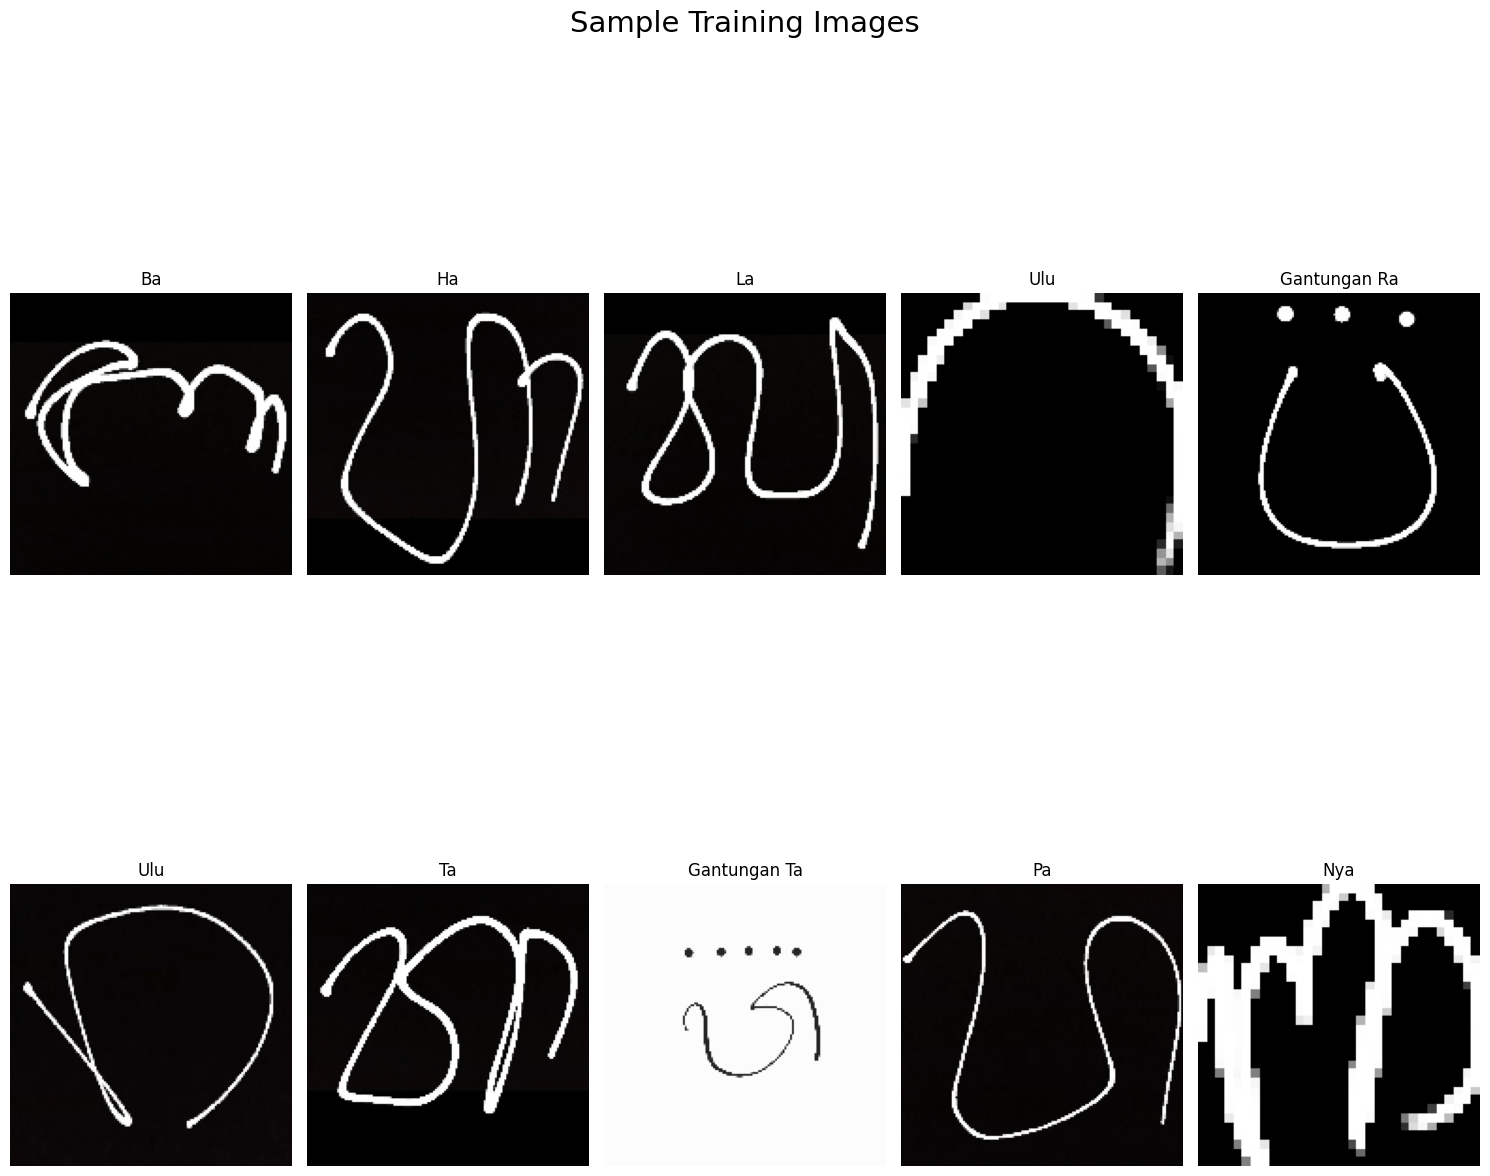

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [18]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(55, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)     

In [19]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] >0.90 and logs['val_accuracy'] >0.90:
            print("\nThe process will stop because it has reached the target.")
            self.model.stop_training = True

callback = CustomCallback()

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=200,
        batch_size=32,
        callbacks = [callback]
    )

Epoch 1/200
89/89 [==============================] - 34s 353ms/step - loss: 3.1930 - accuracy: 0.3431 - val_loss: 2.3095 - val_accuracy: 0.5841
Epoch 2/200
89/89 [==============================] - 7s 75ms/step - loss: 1.6913 - accuracy: 0.7155 - val_loss: 2.0766 - val_accuracy: 0.6712
Epoch 3/200
89/89 [==============================] - 7s 76ms/step - loss: 1.3896 - accuracy: 0.8055 - val_loss: 1.8498 - val_accuracy: 0.7259
Epoch 4/200
89/89 [==============================] - 7s 75ms/step - loss: 1.2333 - accuracy: 0.8414 - val_loss: 1.8242 - val_accuracy: 0.7259
Epoch 5/200
89/89 [==============================] - 7s 74ms/step - loss: 1.0776 - accuracy: 0.8808 - val_loss: 1.8386 - val_accuracy: 0.7414
Epoch 6/200
89/89 [==============================] - 6s 70ms/step - loss: 1.0107 - accuracy: 0.8989 - val_loss: 1.7099 - val_accuracy: 0.7569
Epoch 7/200
89/89 [==============================] - 6s 72ms/step - loss: 0.9580 - accuracy: 0.9139 - val_loss: 1.7754 - val_accuracy: 0.7272
Epoc

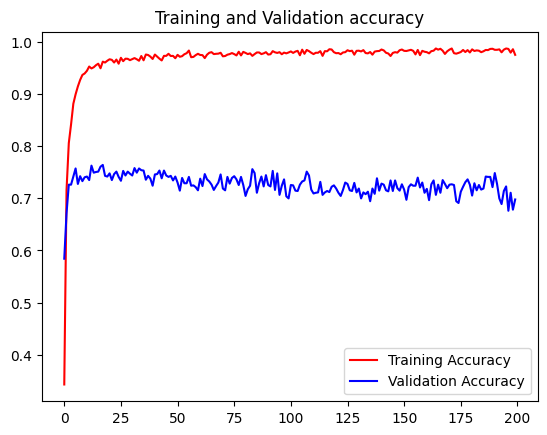

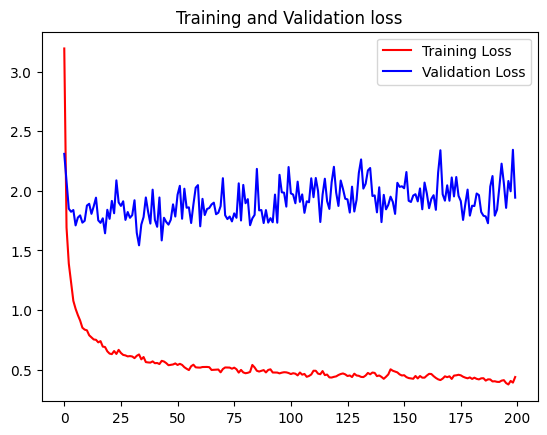

In [20]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc = 'best')
plt.show()

In [1]:
model.save("D:/SELF/ML/aksara-detection/code/findingbali/model/modelcnn1.h5")

NameError: name 'model' is not defined

51/51 [==============================] - 1s 22ms/step


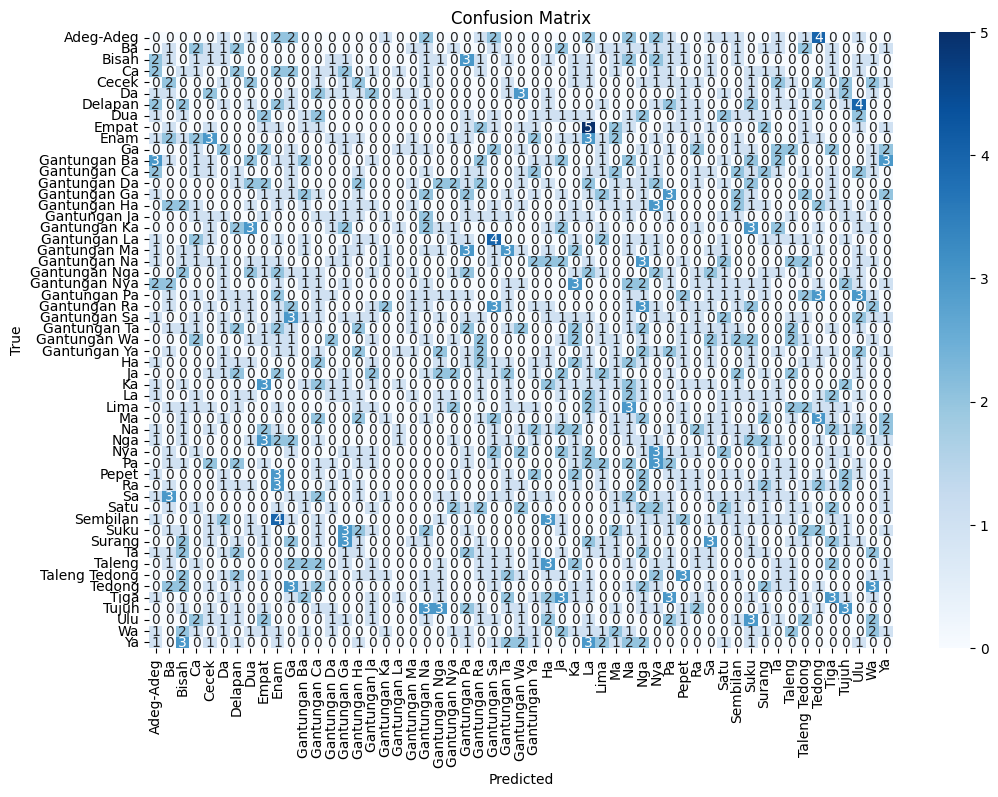

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali53.h5")

# Generate predictions for the validation dataset
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation dataset
y_true = validation_generator.classes

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali53.h5")

# Function to classify the input image
def classify_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]

    return class_index, confidence

# Update the labels dictionary with class mappings
labels = {
    0: 'Adeg-Adeg',
    1: 'Ba',
    2: 'Bisah',
    3: 'Ca',
    4: 'Cecek',
    5: 'Da',
    6: 'Delapan',
    7: 'Dua',
    8: 'Empat',
    9: 'Enam',
    10: 'Ga',
    11: 'Gantungan Ba',
    12: 'Gantungan Ca',
    13: 'Gantungan Da',
    14: 'Gantungan Ga',
    15: 'Gantungan Ha',
    16: 'Gantungan Ja',
    17: 'Gantungan Ka',
    18: 'Gantungan La',
    19: 'Gantungan Ma',
    20: 'Gantungan Na',
    21: 'Gantungan Nga',
    22: 'Gantungan Nya',
    23: 'Gantungan Pa',
    24: 'Gantungan Ra',
    25: 'Gantungan Sa',
    26: 'Gantungan Ta',
    27: 'Gantungan Wa',
    28: 'Gantungan Ya',
    29: 'Ha',
    30: 'Ja',
    31: 'Ka',
    32: 'La',
    33: 'Lima',
    34: 'Ma',
    35: 'Na',
    36: 'Nga',
    37: 'Nya',
    38: 'Pa',
    39: 'Pepet',
    40: 'Ra',
    41: 'Sa',
    42: 'Satu',
    43: 'Sembilan',
    44: 'Suku',
    45: 'Surang',
    46: 'Ta',
    47: 'Taleng',
    48: 'Taleng Tedong',
    49: 'Tedong',
    50: 'Tiga',
    51: 'Tujuh',
    52: 'Ulu',
    53: 'Wa',
    54: 'Ya'
}



### Checking Models

In [55]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Cecek.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 74ms/step
The photo belongs to class 'Cecek' with confidence 1.00


In [56]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Da.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Gantungan Na' with confidence 0.61


In [40]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Enam.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Enam' with confidence 0.94


In [41]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Gantungan Ka' with confidence 0.79


In [42]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Na' with confidence 0.44


In [43]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Gantungan Ya' with confidence 0.93


In [44]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ka' with confidence 1.00


In [45]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ma.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Satu' with confidence 0.69


In [46]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Na.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ka' with confidence 0.95


In [47]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Pepet.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Pepet' with confidence 0.98


In [48]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Suku.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Suku' with confidence 0.99


In [49]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ta' with confidence 0.63


In [50]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ulu.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ulu' with confidence 0.69


In [51]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ya' with confidence 0.97


### Saving Models

In [51]:
model_json = model.to_json()
with open("aksarabali5.json", "w") as json_file:
    json_file.write(model_json)

model.save("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json")

INFO:tensorflow:Assets written to: D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json\assets


INFO:tensorflow:Assets written to: D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json\assets
